### October 9, 2017 
### Udemy Machine Learning A-Z
### K-Means

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd

In [8]:
data_mall = pd.read_csv('Mall_Customers.csv')
data_mall.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x = data_mall.iloc[:, [-2, -1]].values # the second to last col, and the last col

In [15]:
from sklearn.cluster import KMeans

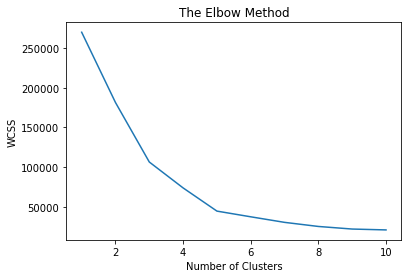

In [16]:
wcss = [] # initializing an empty list, then start the loop

for i in range(1, 11): # not inclusive on the end, i.e., this is 1 thru 10
    kmeans = KMeans(n_clusters = i, # looping thru 1-10 clusters to build elbow graph
                    init = 'k-means++', # not using random to avoid random initialization trap
                    max_iter = 300, # default is 300, max iterations to find clusters
                    n_init = 10, # number of times algorithm will run with different initial centroids
                    random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [18]:
# Fitting KMeans with 5 Clusters

kmeans = KMeans(n_clusters = 5,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)

y_kmeans = kmeans.fit_predict(x)

In [19]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int32)

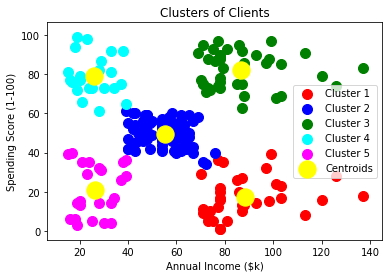

In [21]:
# Visualizing Results

plt.scatter(x[y_kmeans == 0, 0], # only those that belong to cluster 0 (first), and taking the first column of x
            x[y_kmeans == 0, 1], # only cluster 0, and second column of x
            s = 100,
            c = 'red',
            label = 'Cluster 1')

plt.scatter(x[y_kmeans == 1, 0], # only those that belong to cluster 1 (second), and taking the first column of x
            x[y_kmeans == 1, 1], # only cluster 1, and second column of x
            s = 100,
            c = 'blue',
            label = 'Cluster 2')

plt.scatter(x[y_kmeans == 2, 0], 
            x[y_kmeans == 2, 1], 
            s = 100,
            c = 'green',
            label = 'Cluster 3')

plt.scatter(x[y_kmeans == 3, 0], 
            x[y_kmeans == 3, 1], 
            s = 100,
            c = 'cyan',
            label = 'Cluster 4')

plt.scatter(x[y_kmeans == 4, 0], 
            x[y_kmeans == 4, 1], 
            s = 100,
            c = 'magenta',
            label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], # plotting the centroids
            kmeans.cluster_centers_[:, 1], 
            s = 300, 
            c = 'yellow', 
            label = 'Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

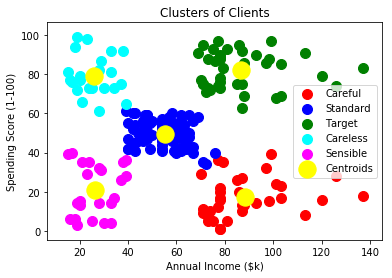

In [22]:
# Visualizing Results, new cluster names based on results

plt.scatter(x[y_kmeans == 0, 0], # only those that belong to cluster 0 (first), and taking the first column of x
            x[y_kmeans == 0, 1], # only cluster 0, and second column of x
            s = 100,
            c = 'red',
            label = 'Careful')

plt.scatter(x[y_kmeans == 1, 0], # only those that belong to cluster 1 (second), and taking the first column of x
            x[y_kmeans == 1, 1], # only cluster 1, and second column of x
            s = 100,
            c = 'blue',
            label = 'Standard')

plt.scatter(x[y_kmeans == 2, 0], 
            x[y_kmeans == 2, 1], 
            s = 100,
            c = 'green',
            label = 'Target')

plt.scatter(x[y_kmeans == 3, 0], 
            x[y_kmeans == 3, 1], 
            s = 100,
            c = 'cyan',
            label = 'Careless')

plt.scatter(x[y_kmeans == 4, 0], 
            x[y_kmeans == 4, 1], 
            s = 100,
            c = 'magenta',
            label = 'Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], # plotting the centroids
            kmeans.cluster_centers_[:, 1], 
            s = 300, 
            c = 'yellow', 
            label = 'Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()